## Stats 211 Problem set 2

[Aaron Zhao]

[Problem Set 2 With Doctor Eaton's Data] 

[2/29/24]

### 1. Explain any new or revised hypotheses for interval ratio data from your own project or from Charlie's grant and loan repayment data

[Your answer here should explain:
1. What are your dependent variables? Why do they interest you?

Loan repayment and State grant aid per student are my dependent variables. According to Doctor Eaton's journal article "The Organizational Ecology of College Affordability: Research Activity, State Grant Aid Policies, and Student Debt at U.S. Public Universities," in less reserach intensive schools students generally have an easier time paying off their debt. In addition, state grant aid provisions are dependent upon the reserach intensiveness of each schools. This reminds me a bit back to what we are doing for the previous assignments with predatory schools. 

2. What are your independent variables? What direction to you hypothesize will be the relationship between your dependent variable and your dependent variables?

Based off of my answer for answer one, my independent variable in relation to my dependent variable is the level of research in universities and the net prices for low-income students. I hypothesize that the more reserach intensive a school is the higher the amounts of state grand aids there are, resulting in a negative relationship between college net price for low income students and their payment rates for student loans. 

3. Why do you think your dependent variables are associated with your independent variables?

Based on Doctor Eaton's journal article, "The Organizational Ecology of College Affordability: Research Activity, State Grant Aid Policies, and Student Debt at U.S. Public Universities," Doctor Eaton highlighted the associations between the dependent and independent variables. 

4. What are your control variables? Do you think they will show any spurious, intervening, or interactive relationships? Why?]

The control variable will be the school acceptance rate. It is an intervening control variable becaue there are no interactions between the variables, according to the article by Doctor Charlie Eaton "The Organiztional Ecology of College Affordability: Reserach Activity, State Grant Aid Policies, and Student Debt at U.S. Public Universities".


### 2. Setting up your session

In the code cell below, do the following:

1. set current directory 
2. set more off 
3. create log file 
4. download the data from its source if it's available online
5. read the data in [preferably only variables you are going to use]

cd "/Users/aaronzhao/Desktop/Desktop/Grad_Stats_II/soc211assignments"

In [1]:
set more off

(-set more- irrelevant in this version of Stata)


In [2]:
log using "Log for Problem Set 2.log", replace

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/aaronzhao/Documents/GitHub/Graduate-Statistics-and-Data-Sci
> ence-for-Sociology/week5/Log for Problem Set 2.log
  log type:  text
 opened on:  19 Feb 2024, 19:39:37


In [3]:
insheet using /Users/aaronzhao/Documents/GitHub/Graduate-Statistics-and-Data-Science-for-Sociology/week5/grants2015_college_affordability20200218.csv, clear

(8 vars, 581 obs)


In [4]:
quietly {
rename hgroup hgroupstring
encode hgroupstring, gen(hgrouptemp)
recode hgrouptemp (1=1 "Highest") (2=3 "High") (3=2 "Very high") (4=4 "Some/None"), gen(hgroup)
qui label var igrnt_low "institutional grant $ per fte"
qui label var sgrnt_low "state grant $ per fte"
qui label var hgroup "research level"
}

In [5]:
ds

year          stabbr        hgroupstring  igrnt_low_~c  hgrouptemp
instnm        control       highdeg       sgrnt_low_~c  hgroup


In [6]:
codebook igrnt_low


-------------------------------------------------------------------------------
igrnt_low_inc                                     institutional grant $ per fte
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [0,60578.5]                   Units: 1.000e-06
         Unique values: 579                       Missing .: 0/581

                  Mean: 6965.15
             Std. dev.: 8034.53

           Percentiles:     10%       25%       50%       75%       90%
                        765.767   2079.92   4656.91   8337.64   15516.2


In [7]:
codebook sgrnt_low_~c


-------------------------------------------------------------------------------
sgrnt_low_inc                                             state grant $ per fte
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [0,40112.09]                  Units: 1.000e-06
         Unique values: 578                       Missing .: 0/581

                  Mean: 3590.03
             Std. dev.: 3788.36

           Percentiles:     10%       25%       50%       75%       90%
                        374.798   1255.38   2955.35   4690.81   6946.94


In [8]:
codebook hgroup


-------------------------------------------------------------------------------
hgroup                                                           research level
-------------------------------------------------------------------------------

                  Type: Numeric (long)
                 Label: hgroup

                 Range: [1,4]                         Units: 1
         Unique values: 4                         Missing .: 0/581

            Tabulation: Freq.   Numeric  Label
                           34         1  Highest
                           37         2  Very high
                           72         3  High
                          438         4  Some/None


In [9]:
bysort hgroup: egen mn_sgrnt_low_inc=mean(sgrnt_low_inc)

In [10]:
%head

,year,instnm,stabbr,control,hgroupstring,highdeg,igrnt_low_inc,sgrnt_low_inc,hgrouptemp,hgroup,mn_sgrnt_low_inc
1,2015,University of Washington-Seattle Campus,WA,1,AAU Public,4,14053.5,7218.514,AAU Public,Highest,6340.64
2,2015,University of Arizona,AZ,1,AAU Public,4,20377.74,33.64918,AAU Public,Highest,6340.64
3,2015,Rutgers University-New Brunswick,NJ,1,AAU Public,4,10849.94,6880.271,AAU Public,Highest,6340.64
4,2015,Georgia Institute of Technology-Main Campus,GA,1,AAU Public,4,10493.57,40112.09,AAU Public,Highest,6340.64
5,2015,University of Michigan-Ann Arbor,MI,1,AAU Public,4,45437.91,563.163,AAU Public,Highest,6340.64


In [11]:
gen sqdv_sgrnt_low_inc=(igrnt_low_inc-mn_sgrnt_low_inc)^2

In [12]:
%head

,year,instnm,stabbr,control,hgroupstring,highdeg,igrnt_low_inc,sgrnt_low_inc,hgrouptemp,hgroup,mn_sgrnt_low_inc,sqdv_sgrnt_low_inc
1,2015,University of Washington-Seattle Campus,WA,1,AAU Public,4,14053.5,7218.514,AAU Public,Highest,6340.64,5.95e+07
2,2015,University of Arizona,AZ,1,AAU Public,4,20377.74,33.64918,AAU Public,Highest,6340.64,1.97e+08
3,2015,Rutgers University-New Brunswick,NJ,1,AAU Public,4,10849.94,6880.271,AAU Public,Highest,6340.64,2.03e+07
4,2015,Georgia Institute of Technology-Main Campus,GA,1,AAU Public,4,10493.57,40112.09,AAU Public,Highest,6340.64,1.72e+07
5,2015,University of Michigan-Ann Arbor,MI,1,AAU Public,4,45437.91,563.163,AAU Public,Highest,6340.64,1.53e+09


In [13]:
collapse ///
(count) n=sgrnt_low_inc ///
(first) mn_sgrnt_low_inc ///
(sum) ssqdv_sgrnt_low= sqdv_sgrnt_low_inc ///
, by(hgroup)

In [14]:
%head

,hgroup,n,mn_sgrnt_low_inc,ssqdv_sgrnt_low
1,Highest,34,6340.64,7.81e+09
2,Very high,37,6196.042,4.66e+09
3,High,72,3874.735,1.78e+10
4,Some/None,438,3109.573,9.60e+09


In [15]:
gen sd_sgrnt_low_inc=sqrt(ssqdv_sgrnt_low/(n-1))

In [16]:
%head

,hgroup,n,mn_sgrnt_low_inc,ssqdv_sgrnt_low,sd_sgrnt_low_inc
1,Highest,34,6340.64,7.81e+09,15380.14
2,Very high,37,6196.042,4.66e+09,11381.04
3,High,72,3874.735,1.78e+10,15840.99
4,Some/None,438,3109.573,9.60e+09,4686.136


In [17]:
gen se_sgrnt_low_inc= sd_sgrnt_low_inc/sqrt(n-1)

In [18]:
%head

,hgroup,n,mn_sgrnt_low_inc,ssqdv_sgrnt_low,sd_sgrnt_low_inc,se_sgrnt_low_inc
1,Highest,34,6340.64,7.81e+09,15380.14,2677.338
2,Very high,37,6196.042,4.66e+09,11381.04,1896.84
3,High,72,3874.735,1.78e+10,15840.99,1879.98
4,Some/None,438,3109.573,9.60e+09,4686.136,224.1683


In [19]:
generate hi_sgrnt_low_inc = mn_sgrnt_low_inc + 1.96 * se_sgrnt_low_inc
generate lo_sgrnt_low_inc = mn_sgrnt_low_inc - 1.96 * se_sgrnt_low_inc

### 3. Create a bar graph with confidence interval whiskers

Create a bar graph that compares interval ratio data for a dependent variable across different nominal categories from an independent variable. If you are using Charlie's data, do this for the state grant aid per low income student variable name **sgrnt_low**

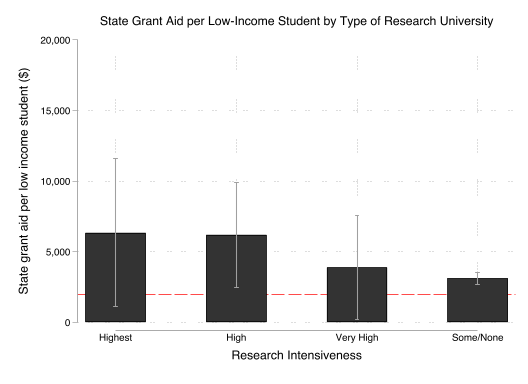

In [20]:
graph twoway (bar mn_sgrnt_low_inc hgroup, barw(.5)) ///
(rcap hi_sgrnt_low_inc lo_sgrnt_low_inc hgroup) , ///
xlabel( 1 "Highest" 2 "High" 3 "Very High" 4 "Some/None", noticks) ///
ytitle("State grant aid per low income student ($)") ///
ylabel(0(5000)20000, format(%10.0fc)) ///
xtitle("Research Intensiveness") legend(off) name(igrntbar, replace) ///
title("State Grant Aid per Low-Income Student by Type of Research University")  ///
yline(1936.825, lp(_) lcolor(red) lstyle(foreground)) scheme(plotplainblind)

### 4. Summarize what you learned from the bar graph

Do the confidence intervals overlap across categories or not? What does this mean?

The confidence interval, or the whiskers, represents the places where the population mean may reside. As the confidence intervals overlap, this means that their relationship is not statistically significant because the whiskers have a lot of overlap. There may not be differences in the population means for different reserach intensiveness of universities. The means will be similar between the highs and very highs, where there will not be a lot of variance. As such, it is very likely that research intensivenss of univerties is not statistically significant to the amount of State Grant Aid per low income student. 


### 4. Estimate OLS regression statistics for the relationship between two interval ratio variables and ouput the table below

If you use Charlie's data, use the loan repayment variable and the **netprice4lowincome** variable.

In [21]:
insheet using loanrepay2013_highestresearch.csv, clear
ds, varwidth(25)

(19 vars, 33 obs)
opeid               stabbr              spend_ugd_4yr_low   instatetuition
acceptrate          hgroup              x_aid_bysticker     xstring
y_lo_inc_rpy        upgrntn             sgrnt_low_inc       ystring
lo_inc_debt_mdn     all_under           igrnt_low_inc       markerlabel
instnm              netprice4lowincome  sandigrnt_low_inc


In [22]:
regress y_lo_inc_rpy netprice4lowincome


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(1, 31)        =      8.48
       Model |  473.546336         1  473.546336   Prob > F        =    0.0066
    Residual |  1730.93895        31  55.8367402   R-squared       =    0.2148
-------------+----------------------------------   Adj R-squared   =    0.1895
       Total |  2204.48528        32  68.8901651   Root MSE        =    7.4724

------------------------------------------------------------------------------
y_lo_inc_rpy | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
netprice4l~e |  -.0011662   .0004005    -2.91   0.007    -.0019829   -.0003495
       _cons |   76.56364   3.782187    20.24   0.000     68.84982    84.27746
------------------------------------------------------------------------------


### 5. Interpret the output

1. What is the coefficient for your independent variable? What does it say about the size and direction of the relationship you estimated?

2. What is the p-value for the coefficient for your independent variable? What does it indicate about how much confidence we can have in the estimated relationship?

3. What is the $r^2$ coefficient of determination? What does it say about how much variation in your dependent variable is explained by the independent variable?

4. What is the F-ratio for your $r^2$. What does it indicate about how much confidence we can have in the $r^2$ estimate?



1. The coefficient for my independent variable, "net price of college for low income stuents", is -0.0011662, or just -0.001 rounded up, obtained thorough examining the table created by using the "regress" command. This indicates that there is a minisculely small negative relagionship between the independent and dependent variable. 

2. Tne p-value for the coefficient for my independent variable is 0.007 (0.0066), which is less than 0.05 (95%) confidene interval, obtained thorough examining the table created by using the "regress" command. This would indicate that the relationship dipicted is statistically significant. 

3. The coefficient of determination/R Squared for this assignment is 0.21(0.2148), obtained thorough examining the table created by using the "regress" command. This R Squared Value indicates that 21% of the variance in the dependent variable is explained by the independent variable. 

4. The f-ratio for my R squared is 8.48, much greater than 4.16, suggesting a high confidence level in our r-suqared value.


### 6. Illustrate the OLS relationship with a scatter plot that includes a fitted line

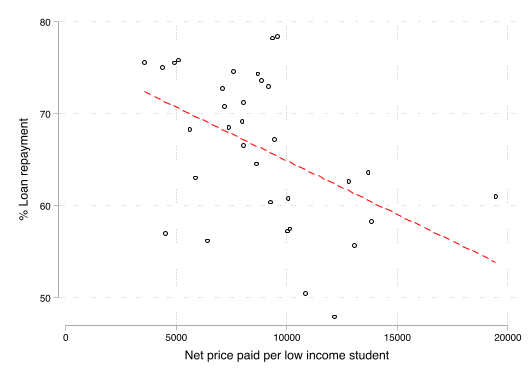

In [25]:
tw (scatter y_lo_inc_rpy netprice4lowincome) ///
(lfit y_lo_inc_rpy netprice4lowincome, color(red)), ///
ytitle("% Loan repayment") ///
xtitle("Net price paid per low income student") legend(off) scheme(plotplainblind)

In [26]:
log close

      name:  <unnamed>
       log:  /Users/aaronzhao/Documents/GitHub/Graduate-Statistics-and-Data-Sci
> ence-for-Sociology/week5/Log for Problem Set 2.log
  log type:  text
 closed on:  19 Feb 2024, 20:55:24
-------------------------------------------------------------------------------
